<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [1]:
!pip install pandas
!pip install matplotlib

Import pandas module


In [2]:
import pandas as pd


Import matplotlib


In [3]:
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [31]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/UDKAZw-kz18Yj8P6icf_qw/survey-data-duplicates.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [ ]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [32]:
# Find duplicate rows and display count and head
duplicates = df[df.duplicated()]

print('There are ', duplicates.shape[0], ' duplicate rows')
print()
print(duplicates.head())

There are  10  duplicate rows

       ResponseId                      MainBranch                 Age  \
65437           1  I am a developer by profession  Under 18 years old   
65438           2  I am a developer by profession     35-44 years old   
65439           3  I am a developer by profession     45-54 years old   
65440           4           I am learning to code     18-24 years old   
65441           5  I am a developer by profession     18-24 years old   

                Employment RemoteWork   Check  \
65437  Employed, full-time     Remote  Apples   
65438  Employed, full-time     Remote  Apples   
65439  Employed, full-time     Remote  Apples   
65440   Student, full-time        NaN  Apples   
65441   Student, full-time        NaN  Apples   

                                        CodingActivities  \
65437                                              Hobby   
65438  Hobby;Contribute to open-source projects;Other...   
65439  Hobby;Contribute to open-source projects;Other..

### Task 2: Analyze Characteristics of Duplicates
1. Identify which columns have the same values in duplicate rows.
2. Analyze the distribution of duplicates across different columns such as Country, Employment, and DevType.


In [33]:
# Identify which columns have the duplicates
duplicate_columns = duplicates.apply(lambda row : row.unique(), axis=0)

# Get counts by Country, Employment and DevType.
count_country = duplicates['Country'].value_counts()
count_employment = duplicates['Employment'].value_counts()
count_devtype = duplicates['DevType'].value_counts()

# Print results
print('\nColumns with sample values in duplicate rows:')
print(duplicate_columns)
print('\nDistribution of duplicates by country;')
print(count_country)
print('\nDistribution of duplicates by employment:')
print(count_employment)
print('\nDistribution of duplicates by DevType:')
print(count_devtype)




Columns with sample values in duplicate rows:
ResponseId                               [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
MainBranch             [I am a developer by profession, I am learning...
Age                    [Under 18 years old, 35-44 years old, 45-54 ye...
Employment             [Employed, full-time, Student, full-time, Stud...
RemoteWork                                      [Remote, nan, In-person]
                                             ...                        
JobSatPoints_11                                               [nan, 0.0]
SurveyLength           [nan, Appropriate in length, Too long, Too short]
SurveyEase             [nan, Easy, Neither easy nor difficult, Diffic...
ConvertedCompYearly                                                [nan]
JobSat                                                             [nan]
Length: 114, dtype: object

Distribution of duplicates by country;
Country
United States of America                                3
United Kingdom of

### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


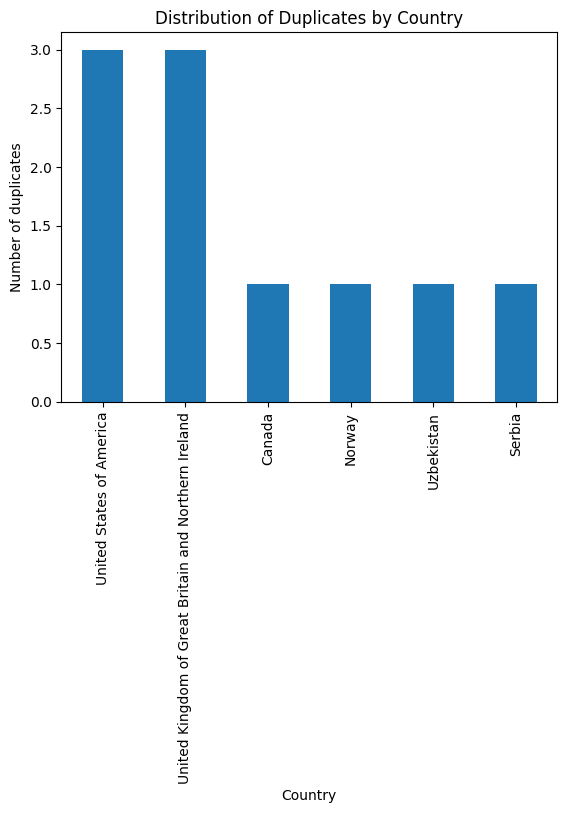

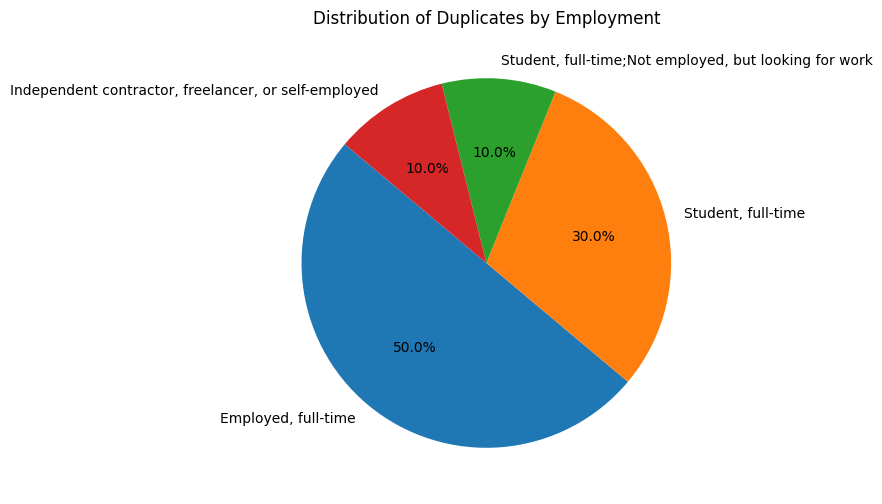

In [34]:
# Visualize distribution of duplicates by Country using a bar chart
count_country.plot(kind='bar')
plt.title('Distribution of Duplicates by Country')
plt.xlabel('Country')
plt.ylabel('Number of duplicates')
plt.show()

# Visualize distribution of duplicates by Employment using a pie chart
plt.figure(figsize=(10, 6))
count_employment.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Duplicates by Employment')
plt.ylabel('')  # Hide y-label for pie chart
plt.show()

### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [36]:
# Columns that are critical for defining uniqueness in the dataset
subset_columns = ['ResponseId']

# Remove duplicates based on the subset of columns
df_unique = df.drop_duplicates(subset=subset_columns)

# Verify the number of rows after removing duplicates
print(df_unique.shape[0])

65437


## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


# Process of Identifying and Removing Duplicates
## 1. Finding the Duplicate Rows

After loading the data into a Pandas dataframe and perfoming some summary analysis, duplicate rows were identified using the Pandas function *duplicated*. Ten duplicate rows were found to exist in which the contents of every column exactly matched the contents of the same columns in another row.

## 2. Analyzing the Characteristics of the Duplicates

The distribution of duplicates was analysed by Country, Employment and DevType. Duplicates were not isolated to a single Country, Employment or DevType.

## 3. Visualizing the Duplicates

The distribution of duplicates by Country was plotted in a bar chart and the distribution of duplicates by Employment was plotted in a pie chart. The Matplotlib library was used for all plots.

## 4. Assessing What to Remove and Execution

It was determined that ResponseId was sufficient to establish that a row was duplicated, as no other columns or combinations of columns should necessarily be unique. 

2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


## 5. Reasoning Behind the Selection of Specific Columns

It is common practice for a column like ResponseId to be, in effect, a primary key and it is assumed that this is a computed generated sequence. There should be no duplicates in this column.  There are no other columns or combinations of columns which uniquely identify a record (something like email address or phone number would be uniquely identifying), and it is therefore possible for duplicates to exist for all other values.

### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
